# Introduction

In this project, you will step into the shoes of an entry-level data analyst at a social media agency, helping to  create a comprehensive report that analyzes the performance of different categories of social media posts.

## Project Scenario

Suppose you work for a social media marketing company that specializes in promoting brands and products on a popular social media platform. Your team is responsible for analyzing the performance of different types of posts based on categories, such as health, family, food, etc. to help clients optimize their social media strategy and increase their reach and engagement.

They want you to use Python to automatically extract tweets posted from one or more categories, and to clean, analyze and visualize the data. The team will use your analysis to  making data-driven recommendations to clients to improve their social media performance. This feature will help the marketing agency deliver tweets on time, within budget, and gain fast results.

## Challenge
Your task will be taking on the role of a social media analyst responsible for collecting, cleaning, and analyzing data on a client's social media posts. You will also be responsible for communicating the insights and making data-driven recommendations to clients to improve their social media performance.  To do this, you will  set up the environment, identify the categories for the post (fitness, tech, family, beauty, etc)  process, analyze, and visualize data.

# 1.0. Imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random

# 2.0. Generate random data

In [3]:
# list of categories for the social media experiment

categories = [
    'Food',
    'Travel',
    'Fashion',
    'Fitness',
    'Music',
    'Culture',
    'Family',
    'Health',
    'Games',
    'Movies',
    'Productivity',
    'Finances'
]

In [4]:
# list of random choices n entries... let's say n = 500,
# use choice method to gather random category,
# use random randint() to form a random integer for the number of likes

n = 1500

data = {
    'Date': pd.date_range('2021-01-01', periods = n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size = n)
}

# 3.0. Data Exploration

In [5]:
# dataframe head
df = pd.DataFrame(data)
df.head()

,Date,Category,Likes
0,2021-01-01,Food,6756
1,2021-01-02,Finances,3567
2,2021-01-03,Fitness,7613
3,2021-01-04,Games,8547
4,2021-01-05,Food,8897


In [6]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1500 non-null   datetime64[ns]
 1   Category  1500 non-null   object        
 2   Likes     1500 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 29.4+ KB


In [7]:
# dataframe description
df.describe()

,Date,Likes
count,1500,1500.000000
mean,2023-01-20 11:59:59.999999744,4825.202000
min,2021-01-01 00:00:00,0.000000
25%,2022-01-10 18:00:00,2261.750000
50%,2023-01-20 12:00:00,4803.000000
75%,2024-01-30 06:00:00,7413.500000
max,2025-02-08 00:00:00,9986.000000
std,NaN,2931.715017


In [8]:
# count of each 'Category' element
df.value_counts('Category')

Category
Food            141
Productivity    137
Games           134
Music           133
Culture         130
Fashion         129
Health          120
Movies          118
Travel          116
Family          115
Finances        114
Fitness         113
Name: count, dtype: int64

# 4.0. Data Cleaning

In [9]:
# let's see the shape of the dataframe

df.shape

(1500, 3)

In [10]:
# is there any null data?
# no

df.isna().sum()

Date        0
Category    0
Likes       0
dtype: int64

In [11]:
# but we could use this method if we find null values
# or we could fill with mean, median or mode values
# or even values acquired by ml models like k-nn

df.dropna(inplace = True)
print(df.to_string())

           Date      Category  Likes
0    2021-01-01          Food   6756
1    2021-01-02      Finances   3567
2    2021-01-03       Fitness   7613
3    2021-01-04         Games   8547
4    2021-01-05          Food   8897
5    2021-01-06       Fashion   1676
6    2021-01-07         Music   3010
7    2021-01-08       Fashion   8303
8    2021-01-09        Health    104
9    2021-01-10        Movies   1782
10   2021-01-11       Fitness   6018
11   2021-01-12          Food   3019
12   2021-01-13          Food   5693
13   2021-01-14         Games   9193
14   2021-01-15        Family   7923
15   2021-01-16        Travel   5131
16   2021-01-17        Travel   3480
17   2021-01-18  Productivity   4718
18   2021-01-19       Culture   5902
19   2021-01-20      Finances   5094
20   2021-01-21       Culture   5793
21   2021-01-22        Movies   1494
22   2021-01-23       Culture   7217
23   2021-01-24  Productivity    123
24   2021-01-25        Movies   5177
25   2021-01-26        Health   1353
2

In [12]:
# is there any duplicate data?
# no
df.duplicated().sum()

0

In [13]:
# but we could drop the duplicates if there were any

df.drop_duplicates(inplace = True)

In [14]:
# let's check once again the shape of the dataframe

df.shape

(1500, 3)

In [15]:
# now let's check the data types to format if necessary
# 'Date' is already in a proper datetime format
# 'Likes' is also already an integer
df.dtypes

Date        datetime64[ns]
Category            object
Likes                int32
dtype: object

In [16]:
# we could use this to convert 'Date' to a datetime
df['Date'] = pd.to_datetime(df['Date'])

# and this to convert 'Likes' data to an integer
df['Likes'] = df['Likes'].astype(int)

In [17]:
df.dtypes

Date        datetime64[ns]
Category            object
Likes                int32
dtype: object

# 5.0. Data Analysis and Visualization

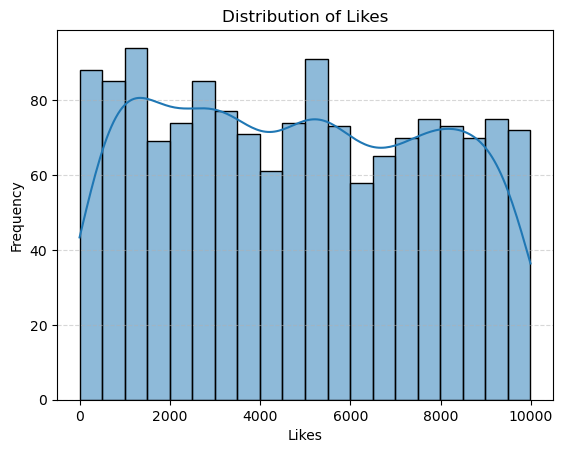

In [18]:
# visualizing the distribution of likes with histograms

sns.histplot(data = df, x = 'Likes', bins = 20, kde = True)
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

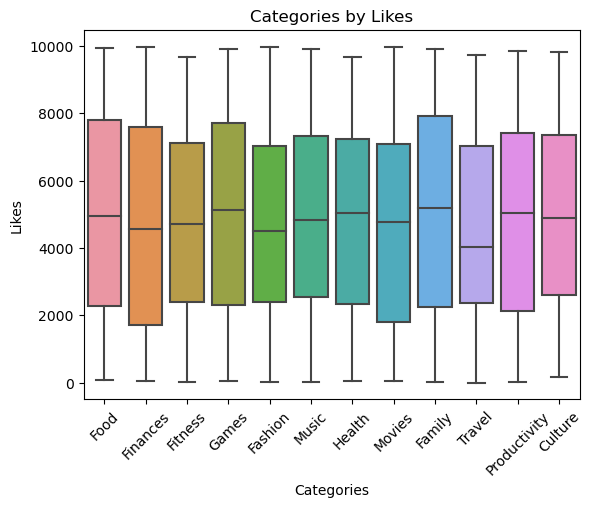

In [19]:
# boxplots with the x axis as 'Category' and the y axis as 'Likes'

sns.boxplot(data=df, x = 'Category', y = 'Likes')
plt.xlabel('Categories')
plt.ylabel('Likes')
plt.title('Categories by Likes')
plt.xticks(rotation = 45)
plt.show()

In [20]:
# mean of the 'Likes' category

mean_ = df['Likes'].mean()
print(f'Mean value of Likes: {mean_}')

Mean value of Likes: 4825.202


In [21]:
# mean of 'Likes' for each 'Category'

mean_cat = df.groupby('Category')['Likes'].mean()
print(f'Mean values of Likes by Category')
print(mean_cat)

Mean values of Likes by Category
Category
Culture         4826.838462
Family          5131.426087
Fashion         4801.899225
Finances        4694.570175
Fitness         4677.778761
Food            4844.921986
Games           5058.895522
Health          4821.008333
Movies          4656.186441
Music           4854.473684
Productivity    4907.270073
Travel          4569.543103
Name: Likes, dtype: float64


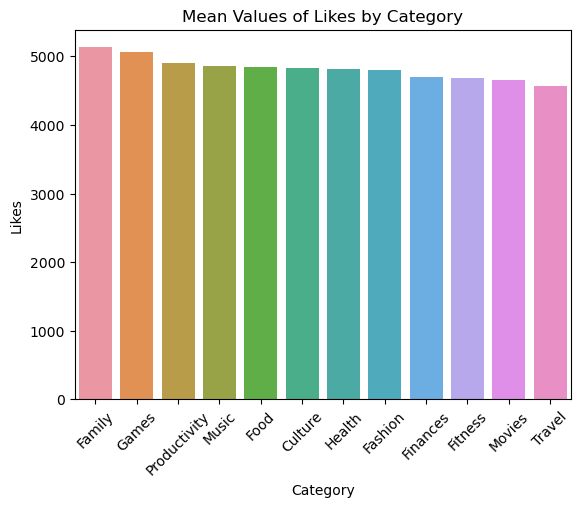

In [22]:
# barplots of the mean of 'Likes' for each 'Category'

mean_cat = mean_cat.sort_values(ascending = False)
sns.barplot(x= mean_cat.index, y = mean_cat.values)
plt.xticks(rotation = 45)
plt.xlabel('Category')
plt.ylabel('Likes')
plt.title('Mean Values of Likes by Category')
plt.show()

# Conclusion

A higher concentration of values was found in posts with likes ranging from 1500 to 3000. This number remains reasonably consistent between 60 and 80, but the peak is between 2000 and 3000. Any action aimed at maximizing visibility on Twitter should target posts from profiles that maintain this average.

Although the categories have similar distributions, the central tendency differs significantly, and overall, posts related to 'Health' have a higher median than the other categories.

The top 3 average values by post category are: 
1) 'Family', 
2) 'Health', 
3) 'Fashion'. 

Actions focusing on these three categories have the best visibility for our company's products.